The statement below causes the matplotlib graphs to appear within the Jupter notebook rather than in a separate window that pops up.  This can be very convenient because, among other reasons, the image will be retained in the notebook and computation will not be paused when many graphs are constructed within a loop.  Statements that start with '%' are called magic functions.  I think it is also fair to say that these are system-level commands that you might type in a DOS Command Window.  The '%' indicates a system command so that it is executed properly.  This web page talks about magis functions: https://stackoverflow.com/questions/20961287/what-is-pylab

In [2]:
%matplotlib inline

Paste the text from the file matplotlib_eg_line.py below and execute it (Ctrl+Enter).

Paste the contents of matplotlib_eg_scatter.py in the cell below and execute it.

We'll use pandas to input the data and manage it so we'll need to import that package.

In [3]:
import pandas as pd

we will be working with data in the form of pandas DataFrame data.  DataFrame data are often indicated with variable names starting with df.  I have also appended '_con' to the variable name to indicate we are working with construction data.  This is time series data for public (governmental) construction spending and private construction spending.

The pandas .read_csv() method is very useful.  You'll possibly need to adjust the path to the file based on where the .csv file is in relation to your Jupyter default folder.  

In [4]:
#df_con = pd.read_csv('D:\\TeachingMaterials\\BusinessAnalytics\\Visualization\\VizData\\construction.csv')
df_con = pd.read_csv('construction.csv')

Use the .head() function to look at the first five rows of the DataFrame.  Note that the data files must have column headings in the first row.  Inspect the column headings

In [21]:
df_con.head()

,Month,Total Construction,Private Construction,Public Construction
0,1,59516,45273,14243
1,2,58588,44475,14113
2,3,63782,49396,14386
3,4,69504,53283,16221
4,5,73384,55009,18375


This next statement imports the matplotlib graphing package into Jupyter using the very popular, if not ubiquitous alias, plt.

In [6]:
import matplotlib.pyplot as plt

We can extract a column of data from a DataFrame by using its name, as follows.  In this case the data are from the construction data set.

In [23]:
df_con['Total Construction']

0      59516
1      58588
2      63782
3      69504
4      73384
5      77182
6      78863
7      79460
8      76542
9      75710
10     71362
11     63984
12     59877
13     58526
14     64506
15     69638
16     74473
17     80377
18     82971
19     85191
20     83841
21     83133
22     77915
23     71050
24     64934
25     64138
26     73238
27     78354
28     83736
29     89932
       ...  
116    75372
117    74222
118    68809
119    62242
120    55671
121    55981
122    60796
123    66223
124    72240
125    77876
126    78897
127    81712
128    80812
129    81520
130    77091
131    68136
132    59143
133    58395
134    64036
135    70535
136    77327
137    81722
138    83104
139    85677
140    85383
141    85193
142    77931
143    71502
144    64661
145    63368
Name: Total Construction, dtype: int64

Now, let's adapt the plotting code above to the df_con DataFrame data...  Note that Data Series are extracted from the pandas DataFrame using two different methods in the first two lines of the code.  If the column heading does not have any spaces, then you can use the method reflected in the first line.

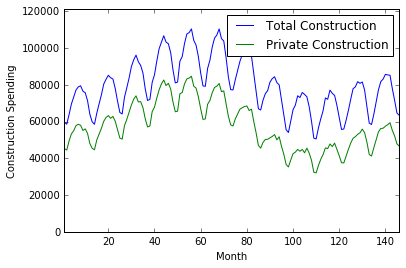

In [24]:
x = df_con.Month
y = df_con['Total Construction']
y1 = df_con['Private Construction']
plt.plot(x,y,label='Total Construction') # The label parameter is a label for the y axis data that will be used in the legend   
plt.plot(x,y1,label='Private Construction')
plt.xlabel('Month')                      # Title for the horizontal axis
plt.ylabel('Construction Spending')      # Title for the vertical axis
plt.axis([x.min(),x.max(),0,1.1*y.max()])
plt.legend()
plt.savefig('sample.jpg')

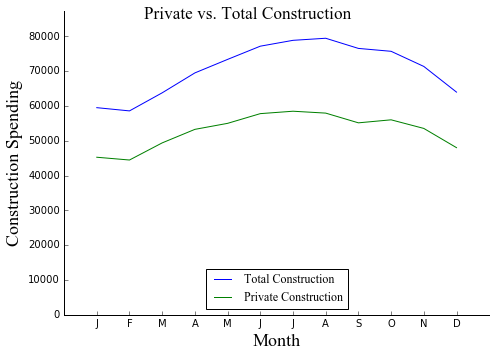

In [7]:
# Extract data for graphing
x = df_con.Month[0:12]
y1 = df_con['Total Construction'][0:12]
y2 = df_con['Private Construction'][0:12]

# My variables
x_labels = ['','J','F','M','A','M','J','J','A','S','O','N','D']

# Create graph and assign Figure and Axes objects to variables fig and ax
fig, ax = plt.subplots()

# Plot the data and set other Axes attributes
ax.plot(x,y1,label='Total Construction')                                  # Add y1 data to graph and create label for the legend
ax.plot(x,y2,label='Private Construction')                                # Add y2 data to graph and create label for the legend
ax.spines['right'].set_visible(False)                                                 # Remove right spine
ax.spines['top'].set_visible(False)                                                   # Remove top spine
ax.legend(loc = 'lower center', prop = {'family':'Times New Roman', 'size':'large'})   # Add legend and format it
ax.set_xlim(0,x.max()+1)                                                              # Set min and max for y axis
ax.set_ylim(0,1.1*y1.max())                                                           # Set min and max for y axis

# Set x-axis attributes
ax.xaxis.set_label_text('Month',fontsize = 18, fontname = 'Times New Roman')
ax.xaxis.set_ticks(range(0,13))
ax.xaxis.set_ticklabels(x_labels)
ax.xaxis.set_tick_params(which = 'both', top = 'off', bottom = 'on', labelbottom = 'on')  # Turn tick marks off for top x axis

# Set y-axis attributes: the parameter 'both' refers to both major and minor tick marks
ax.yaxis.set_label_text('Construction Spending',fontsize = 18, fontname = 'Times New Roman')      # Title for the vertical axis
ax.yaxis.set_tick_params(which = 'both', right = 'off', left = 'on', labelleft = 'on')   # Turn tick marks off for right y axis

# Set Figure attributes
fig.set_size_inches(7,5)             # Set size of figure
fig.suptitle('Private vs. Total Construction',fontsize='xx-large', fontname = 'Times New Roman')
fig.tight_layout()                   # Helps with formatting and fitting everything into the figure
plt.savefig('sample3.jpg')           # Save jpg of figure

The code below replicated the code above in many ways except that the two pandas Series are plotted on different axes within the figure

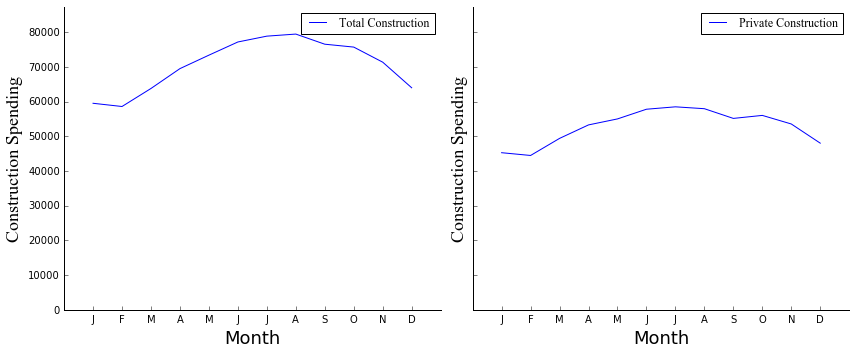

In [26]:
# Extract data for graphing
x = df_con.Month[0:12]
y1 = df_con['Total Construction'][0:12]
y2 = df_con['Private Construction'][0:12]

# My variables
x_labels = ['','J','F','M','A','M','J','J','A','S','O','N','D']

# Create graph and assign Figure and Axes objects to variables fig and Axes variables ax1 and ax2
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True)  # Create 2 Axes (subplots) and assign to ax1 and ax2 respectively

# Plot the data and set other Axes attributes
ax1.plot(x,y1,label='Total Construction')                                  # Add y1 data to graph and create label for the legend
ax2.plot(x,y2,label='Private Construction')                                # Add y2 data to graph and create label for the legend

# Set common axes attributes
for ax in fig.axes:
    ax.spines['right'].set_visible(False)                                                 # Remove right spine
    ax.spines['top'].set_visible(False)                                                   # Remove top spine
    ax.legend(loc = 'upper right', prop = {'family':'Times New Roman', 'size':'large'})   # Add legend and format it
    ax.set_xlim(0,x.max()+1)                                                              # Set min and max for y axis
    ax.set_ylim(0,1.1*y1.max())                                                           # Set min and max for y axis

# Set x-axis attributes
for ax in fig.axes:
    ax.xaxis.set_label_text('Month',fontsize = 18)
    ax.xaxis.set_ticks(range(0,13))
    ax.xaxis.set_ticklabels(x_labels)
    ax.xaxis.set_tick_params(which = 'both', top = 'off', bottom = 'on', labelbottom = 'on')  # Turn top x axis tick marks off 

# Set y-axis attributes: the parameter 'both' refers to both major and minor tick marks
for ax in fig.axes:
    ax.yaxis.set_label_text('Construction Spending',fontsize = 18, fontname = 'Times New Roman')    # Title for the vertical axis
    ax.yaxis.set_tick_params(which = 'both', right = 'off', left = 'on', labelleft = 'on')   # Turn right y axis tick marks off 

# Set Figure attributes
fig.set_size_inches(12,5)           # Set size of figure
fig.tight_layout()                   # Helps with formatting and fitting everything into the figure
plt.savefig('sample3.jpg')           # Save jpg of figure

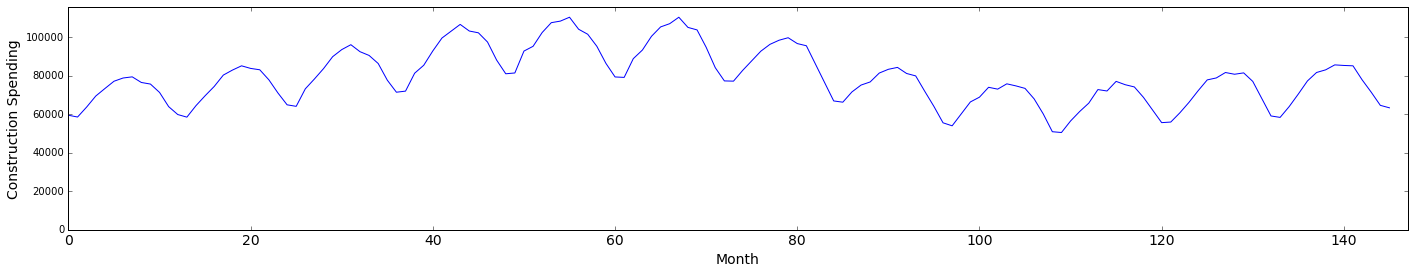

In [27]:
x = df_con.index
y = df_con['Total Construction']
plt.figure(figsize=(24,4))               # figure must be resized prior to .plot() statement
plt.plot(x,y,label='Total Construction')   
plt.xlabel('Month',fontsize=14)                      # Title for the horizontal axis
plt.ylabel('Construction Spending',fontsize=14)      # Title for the vertical axis
plt.axis([0,max(df_con['Month'])+1,0,max(df_con['Total Construction'])*1.05],fontsize=14)    # Set ranges of axes
plt.xticks(fontsize = 14)
plt.show()